In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
from datetime import datetime

In [22]:
# get data from link, skip first 23 rows
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv",skiprows=23)
df.head()

/tmp/ipykernel_7349/2563635654.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv",skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [23]:
# set the date as index to make timeseries easier
df.set_index('date', inplace=True)
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7


In [24]:
# make sure index is datetime
df.index = pd.to_datetime(df.index, dayfirst=True)

/tmp/ipykernel_7349/112963961.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index, dayfirst=True)


/tmp/ipykernel_7349/2224841969.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['time'] = df_day.index.time


TypeError: Invalid object type at position 0

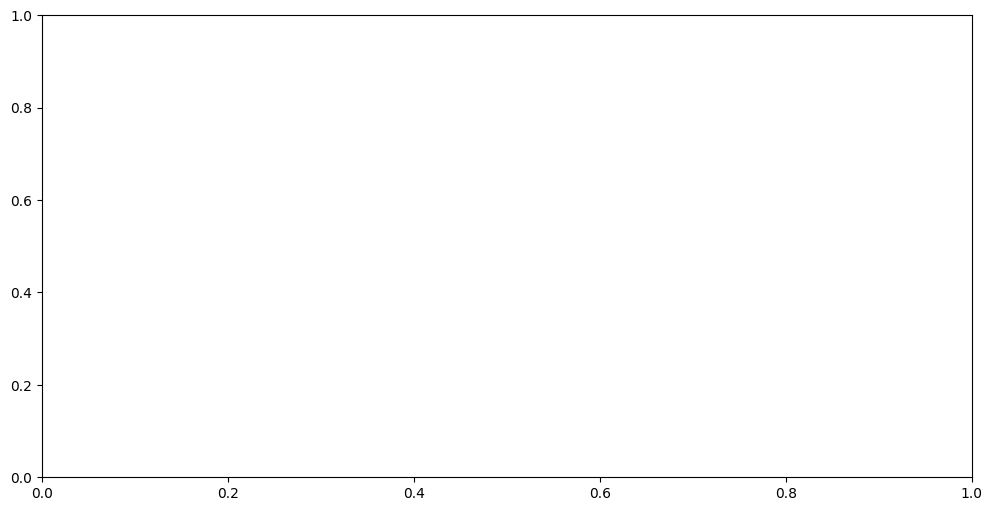

In [25]:

# Filter for a specific day. I looked at csv and chose latest day with multiple rows
day = '2025-09-30'

# Filter rows for whatever day specified
df_day = df[df.index.date == pd.to_datetime(day).date()]


# Extract time for x-axis
df_day['time'] = df_day.index.time


# Plot temperature over time
plt.figure(figsize=(12, 6))
# take the time from the date
sns.lineplot(data=df_day, x='time', y='temp')
plt.title(f"Temperature on {day}")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
